In [255]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import pandas as pd
import seaborn as sns
import sys

species = ["dog","dog","dog", "dog", "cat", "rabbit", 
             "cat", "cat", "cat", "cat","dog", "cat", 
             "cat", "cat", "cat","cat"]
sign = ["melena","melena","bloody diarrhea", "vomiting", "melena", 
          "wattery diarrhea", "bloody diarrhea", "vomiting", "melena",
          "melena", "wattery diarrhea", "wattery diarrhea","wattery diarrhea",
          "bloody diarrhea", "bloody diarrhea","bloody diarrhea"]

is_positive = ["0","1","1","1","0","1","1","0","1","1","0","1","1","0","0","1"]

#Create a list
animal_list = {'sign': sign,'species' : species,'is_positive': is_positive}

#Create a data frame using the list. Use colmuns to specify the order
animal_df = pd.DataFrame(animal_list,
                         columns=['species', 'sign', 'is_positive'])

#subseting th dataframe: No rabbits allowed!
animal_df = animal_df.query('species != "rabbit" ')

#subseting th dataframe: dogs and cats
animal_df_dog = animal_df.query('species == "dog" ').groupby(["species", "sign","is_positive"]).size().to_frame()
animal_df_dog = animal_df_dog.reset_index()
animal_df_cat = animal_df.query('species == "cat" ').groupby(["species", "sign","is_positive"]).size().to_frame()
animal_df_cat = animal_df_cat.reset_index()

#.count() suports one variable only
#animal_df.groupby('species').count()

#subseting th dataframe: No rabbits allowed!
animal_tested = animal_df.query('species != "rabbit" ').groupby(["species", "sign","is_positive"]).size().to_frame()
animal_tested = animal_tested.reset_index()
animal_positive = animal_df.query('species != "rabbit" and is_positive == 1').groupby(["species", "sign","is_positive"]).size().to_frame()
animal_positive = animal_positive.reset_index()

# Merge Frames
frames = [animal_tested, animal_positive]
result = pd.concat(frames)

# df.rename(columns={"0": "a"}) wont work since "0" is not an index
result.columns.values[3] = 'tested'
animal_positive.columns.values[2] = 'freq'

In [256]:
print(result)

   species              sign is_positive  tested
0      cat   bloody diarrhea           0       2
1      cat   bloody diarrhea           1       2
2      cat            melena           0       1
3      cat            melena           1       2
4      cat          vomiting           0       1
5      cat  wattery diarrhea           1       2
6      dog   bloody diarrhea           1       1
7      dog            melena           0       1
8      dog            melena           1       1
9      dog          vomiting           1       1
10     dog  wattery diarrhea           0       1


In [205]:
result

,species_x,sign_x,is_positive_x,tested,species_y,sign_y,is_positive_y,0_y


Markdown types are normal text, with different behaviors than code.
A commennt : using "#" at the begining will make the comments below them as titles.

In [159]:
#dog_plot = sns.countplot( y="sign",hue="is_positive", data=animal_df_dog)
#cat_plot = sns.countplot( y="sign",hue="is_positive", data=animal_df_cat)

#Just like this

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$

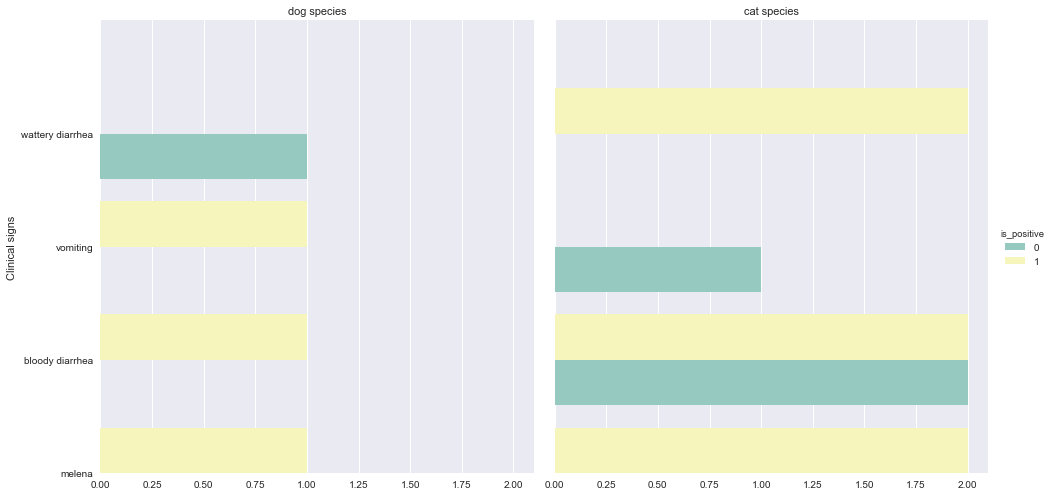

In [185]:
g = sns.factorplot(y="sign", col= "species", hue="is_positive",data=animal_df,size=7, 
                   aspect=1, palette="Set3",
                   kind="count")
(g.set_axis_labels("", "Clinical signs")
   .set_titles("{col_name} {col_var}")
   .set(ylim=(0,4))
   .despine(left=True)) 